In [1]:
import pandas as pd

# Try reading the CSV file with different encodings
encodings = ['utf-8', 'latin1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        print("CSV file read successfully using encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding using encoding:", encoding)

# Now you can work with the DataFrame 'df'
df.sample(5)

Error decoding using encoding: utf-8
CSV file read successfully using encoding: latin1


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4186,ham,Dear got bus directly to calicut,NaN,NaN,NaN
3649,ham,"We are hoping to get away by 7, from Langport....",NaN,NaN,NaN
2697,ham,Can you use foreign stamps for whatever you se...,NaN,NaN,NaN
3351,ham,Call him and say you not coming today ok and t...,NaN,NaN,NaN
2365,ham,Ok try to do week end course in coimbatore.,NaN,NaN,NaN


In [2]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2165,ham,I'm not coming home 4 dinner.,NaN,NaN,NaN
4978,ham,Spending new years with my brother and his fam...,NaN,NaN,NaN
4156,ham,This single single answers are we fighting? Pl...,NaN,NaN,NaN
4237,ham,Lol wtf random. Btw is that your lunch break,NaN,NaN,NaN
1778,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
#1 Data Cleaning 
#2 EDA
#3 Text Preprocessing
#4 model building
#5 Evaluation 
#6 Improvemnt depending on evaluation 

In [5]:
#1 Data Cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Unnamed: 2  50 non-null     object
#Unnamed: 3  12 non-null     object   ]]] -->>most of the values are null, thats why we will drop last three col.
#Unnamed: 4  6 non-null      object

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
89,ham,"Ela kano.,il download, come wen ur free.."
1080,ham,You tell what happen dont behave like this to ...
3651,ham,"Probably not, still going over some stuff here"
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."
881,ham,"see, i knew giving you a break a few times wou..."


In [8]:
#renameing the col. because the existing col. v1 and v2 are not descripting so much
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1767,ham,"K, want us to come by now?"
2891,ham,Babe? You said 2 hours and it's been almost 4 ...
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...
3936,ham,"Yeah, in fact he just asked if we needed anyth..."
3898,ham,ÌÏ mean it's confirmed... I tot they juz say o...


In [9]:
#convert the value of target colnum in bainary (0 and 1)

from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the 'target' column
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#serch for missing and duplicate value
df.isnull().sum()


target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
#remove duplicates value
df = df.drop_duplicates(keep = 'first')

In [13]:
df.duplicated().sum()

0

In [14]:
#now the shape of the df
df.shape

(5169, 2)

In [15]:
#EDA - Strat the 2nd part (Exploratory data analysis)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#check the percentag of spam and ham and represent with a pythart
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

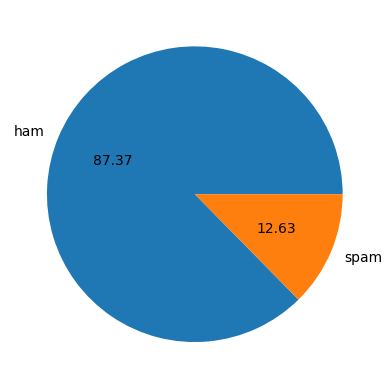

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#from that we cam conclute , data is imblanced

In [20]:
!pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ANIK
[nltk_data]     CHOWDHURY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#count the number of char of a massage and add it in the dataframe 
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#count the number of words of a massage and add it in the dataframe
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#count the number of sentences in a massage and add it in the dataframe 
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe() #total describe

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#describe only ham

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#describe only spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
!pip install seaborn

<Axes: xlabel='num_characters', ylabel='Count'>

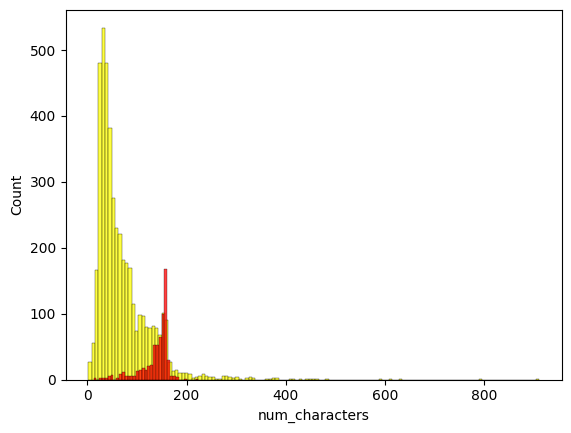

In [31]:
#plot it in histogram
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'],color = 'yellow')
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

In [32]:
#in case of ham massage the number of character is low but in case of spam massage the number of character is very high

<Axes: xlabel='num_words', ylabel='Count'>

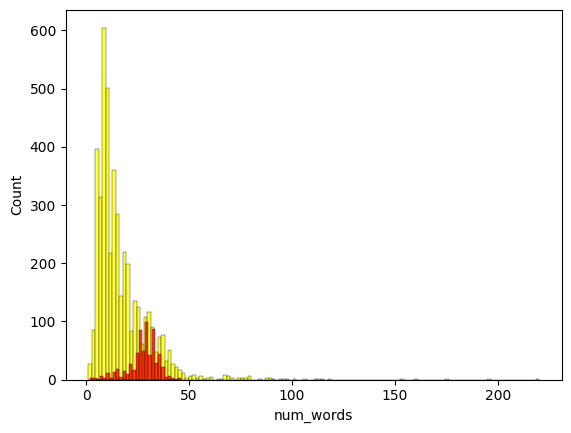

In [33]:
sns.histplot(df[df['target'] == 0]['num_words'],color = 'yellow')
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

<Axes: xlabel='num_sentences', ylabel='Count'>

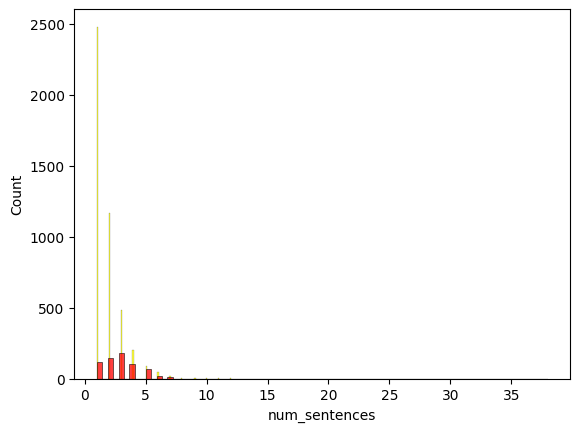

In [34]:
sns.histplot(df[df['target'] == 0]['num_sentences'],color = 'yellow')
sns.histplot(df[df['target'] == 1]['num_sentences'],color = 'red')

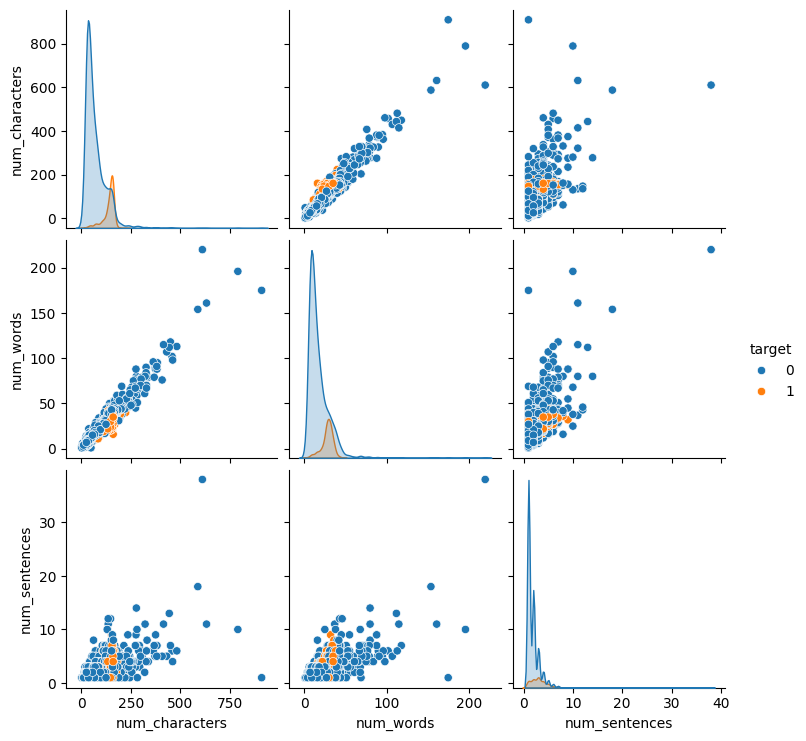

In [35]:
sns.pairplot(df,hue = 'target')

In [36]:
# Select only the columns of interest
df_subset = df[[ "target", "num_characters", "num_words", "num_sentences"]]

# Calculate correlation matrix
correlation_matrix = df_subset.corr()
print(correlation_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


<Axes: >

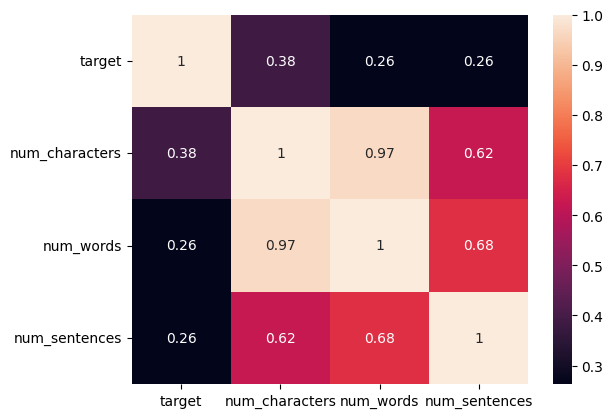

In [37]:
sns.heatmap(correlation_matrix,annot = True)

In [38]:
#data preprocessing

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ANIK
[nltk_data]     CHOWDHURY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loveing')

'love'

In [77]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [78]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
import nltk
nltk.download('punkt')  # This downloads the necessary NLTK data for tokenization
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to C:\Users\ANIK
[nltk_data]     CHOWDHURY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformend_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [47]:
#create word cloud of spam massage

In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [83]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [84]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

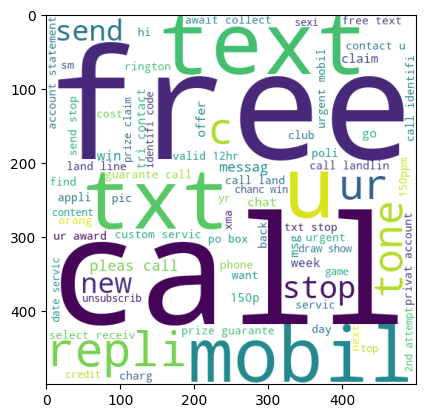

In [85]:
plt.imshow(spam_wc)

In [86]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

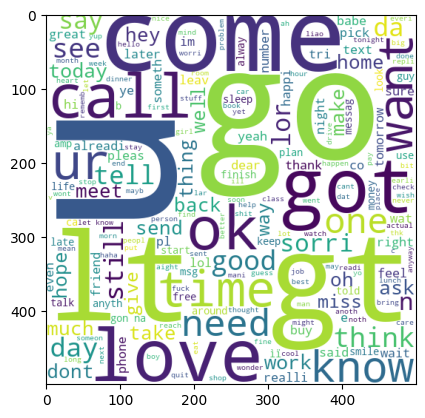

In [87]:
plt.imshow(spam_wc)

In [88]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformend_text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [89]:
spam_corpus = []  # Initialize an empty list

# Iterate over each transformed text message classified as spam
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    # Split the message into words and append them to the spam_corpus list
    for word in msg.split():
        spam_corpus.append(word)


In [90]:
len(spam_corpus)

9939

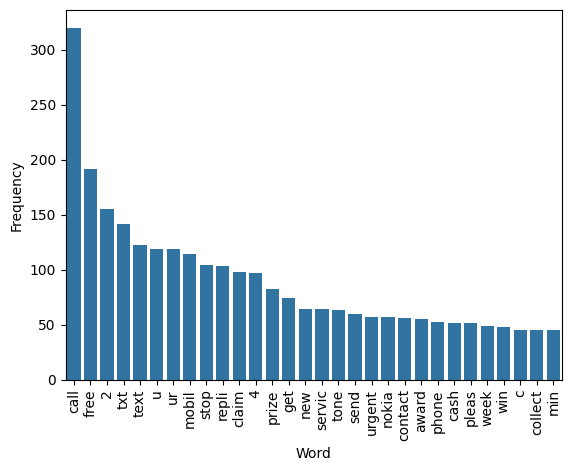

In [91]:
from collections import Counter
# Calculate word frequencies using Counter
word_counts = Counter(spam_corpus)

# Get the 30 most common words and their frequencies
most_common_words = word_counts.most_common(30)

# Convert to DataFrame for plotting
word_counts_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create bar plot
sns.barplot(x='Word', y='Frequency', data=word_counts_df)

plt.xticks(rotation='vertical')
plt.show()

In [92]:
ham_corpus = []  # Initialize an empty list

# Iterate over each transformed text message classified as spam
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    # Split the message into words and append them to the spam_corpus list
    for word in msg.split():
        ham_corpus.append(word)

In [93]:
len(ham_corpus)

35404

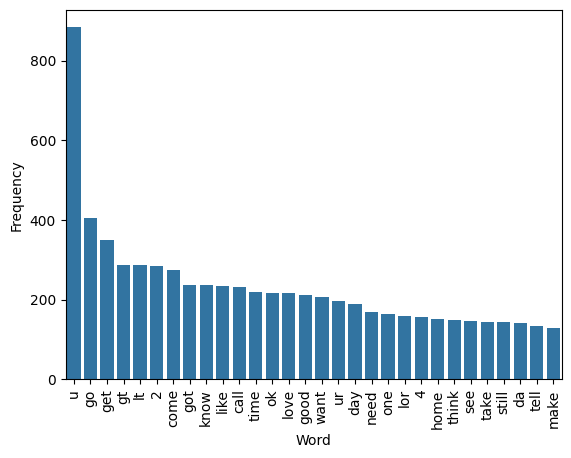

In [94]:
from collections import Counter
# Calculate word frequencies using Counter
word_counts = Counter(ham_corpus)

# Get the 30 most common words and their frequencies
most_common_words = word_counts.most_common(30)

# Convert to DataFrame for plotting
word_counts_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create bar plot
sns.barplot(x='Word', y='Frequency', data=word_counts_df)

plt.xticks(rotation='vertical')
plt.show()

In [95]:
#Model Building 

In [96]:
#vectorize the data using bag of words / tridf

In [143]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [144]:
X = Tfidf.fit_transform(df['transformed_text']).toarray()


In [130]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [131]:
import numpy as np
#appending the num_character col to x
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [132]:
X.shape

(5169, 3001)

In [133]:
y = df['target'].values

In [134]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [137]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [138]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [139]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [145]:
#using mnb-tfidf

In [142]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))